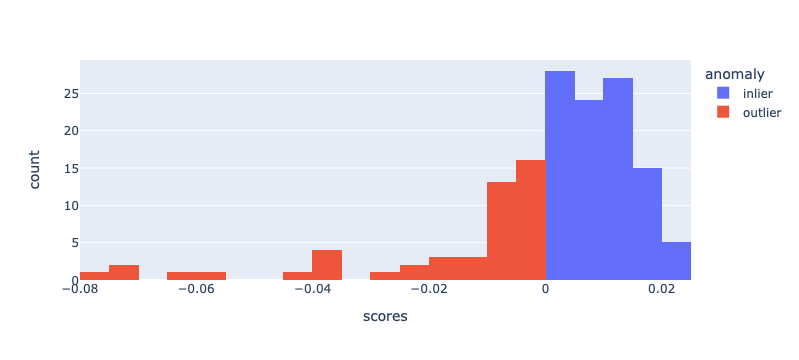

In [9]:
import plotly.express as px
from sklearn.ensemble import IsolationForest
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/tiffok/IBMTeamODcode/main/Lympho%20Dataset.csv?token=GHSAT0AAAAAABRE2LCBKR6VQJLVWHQETZSCYP2DEMA', header=None)
df.columns = df.iloc[0]
df = df.drop(index = 0)
X = df.iloc[:, 1:]
Y = df.iloc[:, 1]

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination='auto', max_features=1, 
                          bootstrap=False, n_jobs=-1, random_state=1)

pred= iforest.fit_predict(X)
df['scores']=iforest.decision_function(X)
df['anomaly_label']=pred

df[df.anomaly_label==-1]

df['anomaly']=df['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')
fig=px.histogram(df,x='scores',color='anomaly')
fig.show()